# Analizando resultados de exámenes

## Introducción

**Disclaimer**: este análisis corresponde a una competición para principiantes de la plataforma [DataCamp](https://app.datacamp.com/learn/competitions/student-exam-scores?activeTab=competition-overview). Se utiliza un dataset con datos ficticios cuyo proposito es ser utilizado con fines educativos.

### Background

Tu mejor amiga es una directora de una escuela. La escuela hace que todos los estudiantes tomen exámenes de matemáticas, lectura y escritura al final del año.

Dado que recientemente has aprendido sobre manipulación y visualización de datos, sugieres ayudar a tu amiga a analizar los resultados de las calificaciones. La directora de la escuela quiere saber si los cursos de preparación para los exámenes son útiles. También quiere explorar el efecto del nivel de educación de los padres en las calificaciones de los exámenes.

### Dataset

El [Dataset](http://roycekimmons.com/tools/generated_data/exams) contiene los siguientes campos: 

- "gender" - masculino / femenino
- "race/ethnicity" -  1 de las 5 combinaciones de raza/etnia 
- "parent_education_level" - nivel educativo más alto alcanzado por alguno de los padres.
- "lunch" - si el estudiante recibe el almuerzo gratis/con precio reducido o precio habitual.
- "test_prep_course" - si el estudiante hizo o no el curso de preparación para el exámen. 
- "math" - nota del exámen en matemáticas.
- "reading" - nota del exámen en lectura.
- "writing" - nota del exámen en escritura.


### Preguntas a responder

1. ¿Cuál es el promedio de las notas en lectura para los estudiantes con y sin el curso de preparación del exámen?
2. ¿Cuál es el promedio de las notas para los diferentes niveles  educativos de los padres?
3. Crear gráficos para visualizar los hallazgos de los puntos 1 y 2.
4. [Opcional] Observar los efectos dentro de los subgrupos. Comparar el promedio de notas para estudiantes con y sin el curso de preparación para los diferentes niveles educativos de los padres (por ejemplo, usando subgráficos). 
5. [Opcional] La directora quiere saber si los chicos que tuvieron un buen desempeño en una materia también obtuvieron buenas notas en las otras. Observar las correlaciones entre las distintas calificaciones.
6. Resumir los hallazgos/resultados (conclusiones).

## Importación de librerías y dataset

In [1]:
#Librerías para importar el dataset y trabajar con un dataframe 
import numpy as np
import pandas as pd

#Librerias para gráficar
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('exams.csv')

In [3]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group C,some high school,standard,completed,62,61,65
1,male,group D,associate's degree,free/reduced,completed,50,57,54
2,female,group B,associate's degree,standard,none,56,68,61
3,female,group A,some high school,standard,completed,78,88,95
4,male,group C,some college,standard,none,81,68,67
...,...,...,...,...,...,...,...,...
995,male,group E,associate's degree,standard,none,65,52,49
996,female,group B,high school,standard,none,77,81,80
997,female,group C,some high school,standard,none,85,91,82
998,male,group B,high school,standard,completed,44,54,54


## Exploración del dataset

In [4]:
df.shape

(1000, 8)

In [5]:
filas, columnas = df.shape
print(f'La cantidad de filas del dataset es: {filas}')
print(f'La cantidad de columnas del dataset es: {columnas}')

La cantidad de filas del dataset es: 1000
La cantidad de columnas del dataset es: 8


**Nombre de las columnas**

In [6]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

**Valores faltantes**

In [7]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

**Tipo de dato de las columnas**

In [8]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

Lo que se hizo hasta ahora se puede resumir con la función *info()*

**Resumen: información sobre las columnas**
- Nombre de cada columna
- Cantidad de valores no nulos por columna
- Tipo de dato de la columna

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## Modificación del dataset 

 **Cambiar el nombre de las columnas**

In [10]:
df.rename(columns = {'parental level of education' : 'parental_level_of_education',
                     'test preparation course': 'test_preparation_course', 
                     'math score' : 'math_score', 
                     'reading score' : 'reading_score',
                     'writing score' : 'writing_score'}, inplace = True)

In [153]:
#Verificar que el cambio de nombre de las columnas se hizo correctamente

df.columns

Index(['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'average_scores'],
      dtype='object')

**Añadir una columna con el promedio de los tres exámenes para cada estudiante**

In [59]:
df['average_scores'] = df[['math_score', 'reading_score', 'writing_score']].mean(axis=1)

In [60]:
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_scores
0,male,group C,some high school,standard,completed,62,61,65,62.666667
1,male,group D,associate's degree,free/reduced,completed,50,57,54,53.666667
2,female,group B,associate's degree,standard,none,56,68,61,61.666667
3,female,group A,some high school,standard,completed,78,88,95,87.000000
4,male,group C,some college,standard,none,81,68,67,72.000000


**Como el dataset no tiene valores faltantes y está bastante limpio no se tiene en cuenta el manejo de los valores faltantes ni se le realizan más modificaciones.** 

## Informe: descripción y visualización de los datos

**Descripción estadística de los datos** 

Esta función devuelve información estadística descriptiva de las columnas con variables cuantitativas. En este caso, sobre las columnas que corresponden a las notas de los exámenes. 

In [12]:
df.describe()

,math_score,reading_score,writing_score
count,1000.000000,1000.000000,1000.000000
mean,66.923000,69.428000,68.193000
std,15.366496,14.487191,15.213455
min,16.000000,22.000000,21.000000
25%,56.750000,59.000000,58.000000
50%,67.000000,69.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


## 1.  ¿Cuál es el promedio de las notas en lectura para los estudiantes con y sin el curso de preparación del exámen?

In [152]:
#utilizar dos corchetes para indicar que se calcula la media sobre la columna 'reading_score'
#para poder mantener la estructura de dataframe y visualizar mejor los resultados

grouped_data_course = df.groupby('test_preparation_course')[['reading_score']].mean()

#Reemplazar el nombre de la columna reading_score para indicar que es el promedio de esa columna.

grouped_data_course.rename(columns = {'reading_score' : 'mean_reading_score'}, inplace=True)

In [14]:
grouped_data_course

,mean_reading_score
test_preparation_course,
completed,73.896341
none,67.247024


### Gráficos para visualizar el resultado

Un gráfico de barras visualiza el promedio de los reasultados en el exámen de lectura según si completaron o no el curso de preparación, pero no ofrece más información ni permite sacar más conclusiones sobre los datos. 

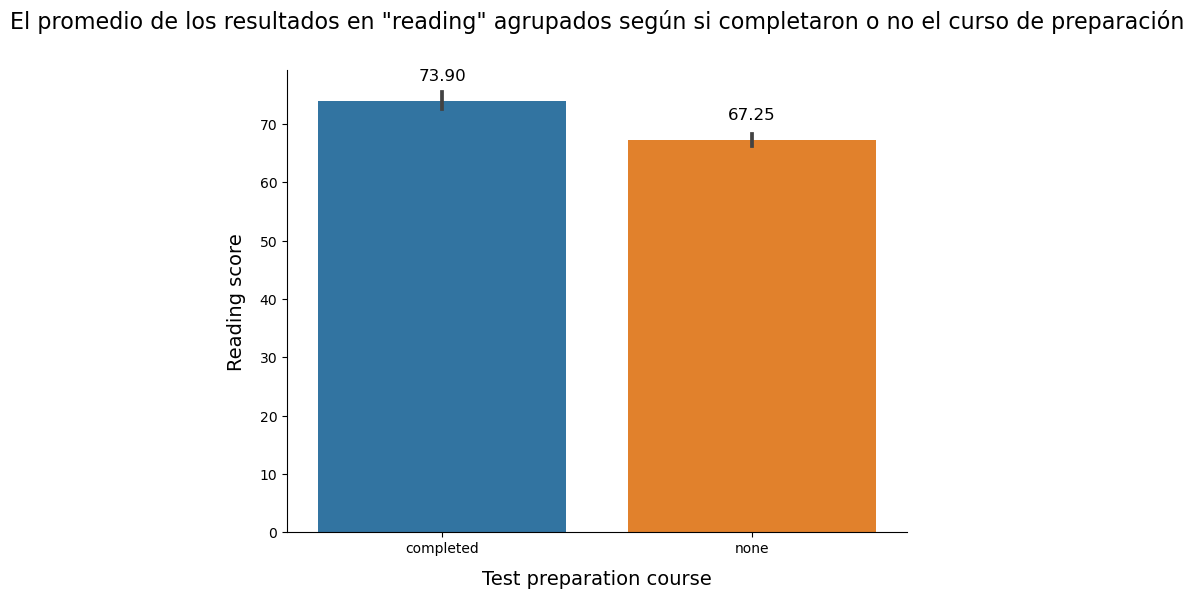

In [15]:
plt.figure(figsize=(8,6))

#Defino las características del gráfico
sns.barplot(x='test_preparation_course', y='reading_score', data=df)


#Defino el titulo del gráfico y los nombres de los ejes
plt.title('El promedio de los resultados en "reading" agrupados según si completaron o no el curso de preparación', size=16, pad=30)
plt.xlabel('Test preparation course', size=14, labelpad=10)
plt.ylabel('Reading score',size=14, labelpad=10)

#calcular las medias 
medias = df.groupby('test_preparation_course')['reading_score'].mean()

# Agregar etiquetas a las barras
padding = 3
for i in range(2):
    plt.text(i, medias[i] + padding, f'{medias[i]:.2f}', size='large',  ha='center',va='bottom')
    
#Configuro cómo se visualizo el gráfico. No uso la visualición por default: el gráfico encuadrado
plt.gca().spines["top"].set_visible(False) #Le saco la línea de arriba del encuadre
plt.gca().spines["right"].set_visible(False) #Le saco la línea del lado derecho del encuadre
plt.grid(False) #le saco la grilla de fondo al gráfico

#Visualizo el gráfico
plt.show()

Para visualizar los resultados de la primera pregunta  es preferible utilizar un gráfico de cajas y bigotes.

En el *eje x* se visualiza la variable categórica por la que se agrupan los datos, y en el *eje y* se visualiza la variable cuantitativa a partir de cuyos datos se calcula el promedio.

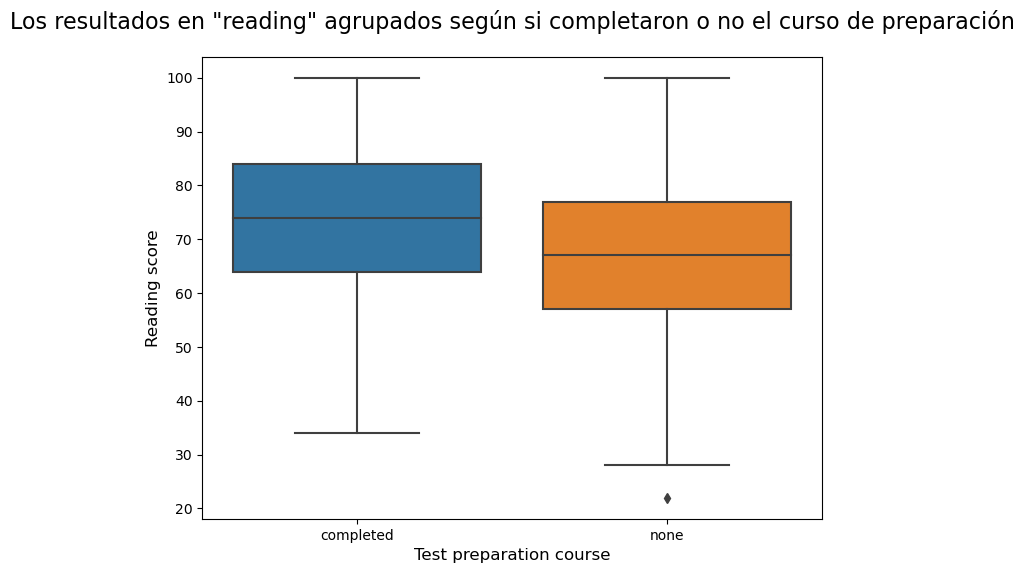

In [16]:
plt.figure(figsize=(8,6))

#Defino las características del gráfico
sns.boxplot(x='test_preparation_course', y='reading_score', data=df)


#Defino el titulo del gráfico y los nombres de los ejes
plt.title('Los resultados en "reading" agrupados según si completaron o no el curso de preparación', size=16, pad=20)
plt.xlabel('Test preparation course', size=12)
plt.ylabel('Reading score',size=12)

#Visualizo el gráfico
plt.show()

Si bien el gráfico de cajas y bigotes visualiza la mediana y no la media, es la mejor forma de visualizar los resultados de las calificaciones en lectura según si los estudiantes completaron o no el curso de preparación del exámen. Y es que en este caso, la mediana y la media tienen practicamente el mismo valor. En el  gráfico de cajas se puede apreciar mejor cual fue la nota más baja, la nota más alta, y la distribución de los datos (que justamente por ser la mediana = media, es simétrica). 

Para acompañar el análisis gráfico se calcula la media, la mediana, el valor máximo, el valor mínimo y la cantidad de datos, agrupados según si completaron o no el curso de preparación. Así se puede ver que media = mediana. Y si bien la cantidad de estudiantes que no completaron el curso de preparación es el doble de la cantidad de estudianes que sí lo completaron, lo que podría introducir un sesgo, si se analiza junto con el gráfico de cajas se puede ver que la varaibiliad de los datos para los dos grupos es casi la misma. 

In [17]:
df.groupby('test_preparation_course').agg({'reading_score' : ['mean', 'median', 'max', 'min', 'count']})

reading_score                      
                                 mean median  max min count
test_preparation_course                                    
completed                   73.896341   74.0  100  34   328
none                        67.247024   67.0  100  22   672

De este gráfico se puede concluir que quienes realizaron el curso de preparación del exámen tienen una mayor probabilidad de tener notas más altas y de aprobar pero tampoco se aprecia una diferencia tan grande con quienes no completaron el curso de preparación. 

Sería interesante contar con más datos y características de los estudiantes para analizar si quienes completaron el curso de preparación esta vez presentaban mayores dificultades para aprobar y si mejoraron sus notas, en vez de compararlos con quienes no completaron ya que pueden ser estudiantes que no presenten dificultades para estudiar y aprobar. 

## 2. ¿Cuál es el promedio de las notas para los diferentes niveles  educativos de los padres?

### Opción 1

Para contestar a esta pregunta se agrupan los promedios de las notas para los exámenes de matemática, lectura y escritura; según el nivel educativo alcanzado por los padres. Y se ordena la información resultante del dataframe según el nivel educativo de los padres, de menor a mayor.

In [154]:
# Definir el orden personalizado
orden_personalizado = ["some high school", "high school", "some college",  "associate's degree", "bachelor's degree","master's degree"]

# Conviertir la columna ''parental_level_of_education' en una categoría con el orden personalizado
df['parental_level_of_education'] = pd.Categorical(df['parental_level_of_education'], categories=orden_personalizado, ordered=True)

#Agrupar y calcular el promedio
mean_scores_grouped = df.groupby('parental_level_of_education')[['math_score','reading_score','writing_score']].mean().sort_values(by='parental_level_of_education', ascending=True)

In [155]:
mean_scores_grouped

,math_score,reading_score,writing_score
parental_level_of_education,,,
some high school,63.253807,64.431472,62.426396
high school,65.437500,67.693182,65.573864
some college,66.313636,68.804545,67.268182
associate's degree,69.472362,72.155779,71.301508
bachelor's degree,68.691729,72.203008,72.390977
master's degree,71.933333,76.293333,76.506667


### Gráfico para visualizar el resultado

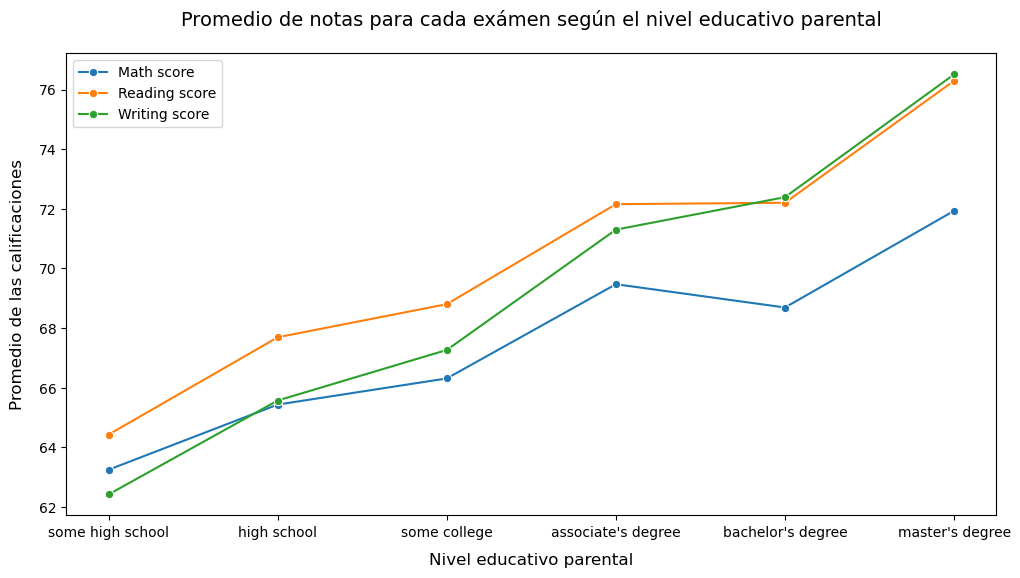

In [145]:
plt.figure(figsize=(12,6))

sns.lineplot(data=mean_scores_grouped, x='parental_level_of_education', y='math_score', marker='o', label='Math score')
sns.lineplot(data=mean_scores_grouped, x='parental_level_of_education', y='reading_score', marker='o', label='Reading score')
sns.lineplot(data=mean_scores_grouped, x='parental_level_of_education', y='writing_score', marker='o', label='Writing score')


plt.title('Promedio de notas para cada exámen según el nivel educativo parental',size=14, pad=20)
plt.ylabel('Promedio de las calificaciones', size=12, labelpad=10)
plt.xlabel('Nivel educativo parental',size=12, labelpad=10)

plt.show()

Al momento de visualizar con un gráfico el resultado de la segunda pregunta es más util utilizar el dataframe original con los calificaciones promedio para cada uno de lo exámenes. Permite observar mejor la correlación entre el nivel educativo de los padres según de qué examen se trate.

### Opción 2

In [61]:
grouped_data_educ= df.groupby('parental_level_of_education')[['average_scores']].mean().sort_values('average_scores', ascending = False)

In [62]:
grouped_data_educ

,average_scores
parental_level_of_education,
master's degree,74.911111
bachelor's degree,71.095238
associate's degree,70.976549
some college,67.462121
high school,66.234848
some high school,63.370558


De este resultado se puede apreciar que a mayor nivel educativo en los padres, mejores resultados en general obtiene el estudiante. 

A mi criterio de esta forma resulta más sencillo apreciar la correlación entre el nivel educativo de los padres y el promedio de las notas de los exámenes de un estudiante cuando se aplica un método de análisis cuyos resultados esten en una sola columna. 


### Gráfico para visualizar el resultado

A continuación, se realiza un gráfico de línea para plasmar visualmente el resultado aunque no aporta mucha más información. 

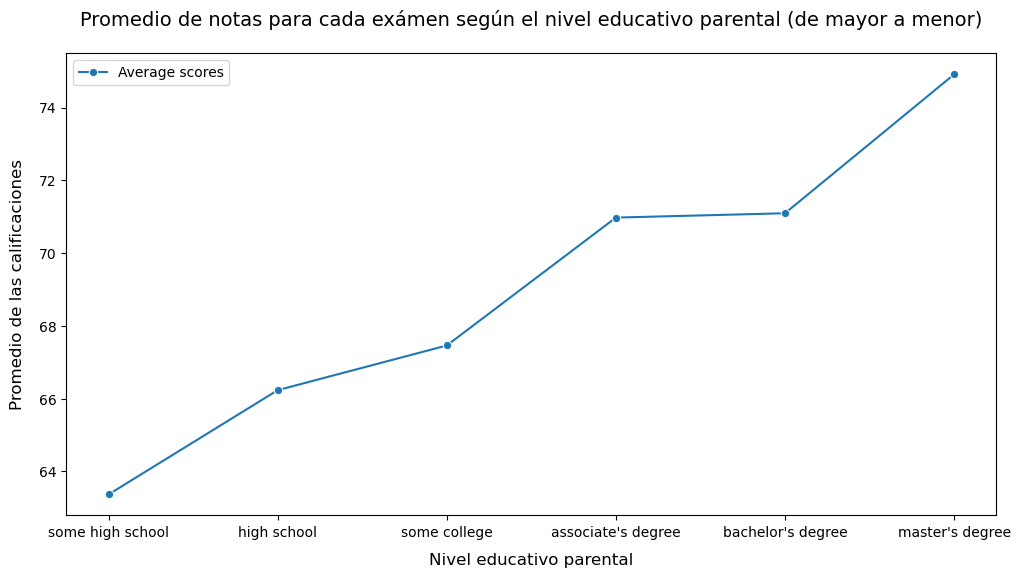

In [156]:
plt.figure(figsize=(12,6))

sns.lineplot(data=grouped_data_educ, x='parental_level_of_education', y='average_scores', marker='o', label='Average scores')


plt.title('Promedio de notas para cada exámen según el nivel educativo parental (de mayor a menor)',size=14, pad=20)
plt.ylabel('Promedio de las calificaciones', size=12, labelpad=10)
plt.xlabel('Nivel educativo parental',size=12, labelpad=10)

plt.show()

## 3. Observar los efectos dentro de los subgrupos. Comparar el promedio de notas para estudiantes con y sin el curso de preparación para los diferentes niveles educativos de los padres.

Para abordar este punto se aplica un método de análisis sobre el dataframe creando dos tablas dinámicas.

En  ambas tablas los datos se agrupan por si completaron o no el curso de preparación para los exámenes y por el nivel educativo de los padres.

En la primera tabla se muestra el promedio de calificaciones para cada exámen:

In [148]:
tabla_dinamica = df.groupby(['test_preparation_course', 'parental_level_of_education'])[['math_score', 'reading_score', 'writing_score']].mean().unstack('test_preparation_course')
tabla_dinamica

math_score            reading_score             \
test_preparation_course      completed       none     completed       none   
parental_level_of_education                                                  
some high school             65.051724  62.503597     69.155172  62.460432   
high school                  70.450000  62.844828     73.116667  64.887931   
some college                 71.476923  64.148387     73.461538  66.851613   
associate's degree           71.586667  68.193548     75.306667  70.250000   
bachelor's degree            70.750000  67.927835     75.500000  70.979381   
master's degree              73.294118  70.804878     79.382353  73.731707   

                            writing_score             
test_preparation_course         completed       none  
parental_level_of_education                           
some high school                69.586207  59.438849  
high school                     73.433333  61.508621  
some college                    74.169231  64.374194  
associate's degree              76.106667  68.395161  
bachelor's degree               77.777778  70.391753  
master's degree                 81.617647  72.268293

En la segunda tabla se muestra el promedio de la calificación promedio que tiene cada estudiante (se utiliza la columna 'average_scores' creada previamente):

In [149]:
tabla_dinamica_2 = df.groupby(['test_preparation_course', 'parental_level_of_education'])[['average_scores']].mean()
tabla_dinamica_2

average_scores
test_preparation_course parental_level_of_education                
completed               some high school                  67.931034
                        high school                       72.333333
                        some college                      73.035897
                        associate's degree                74.333333
                        bachelor's degree                 74.675926
                        master's degree                   78.098039
none                    some high school                  61.467626
                        high school                       63.080460
                        some college                      65.124731
                        associate's degree                68.946237
                        bachelor's degree                 69.766323
                        master's degree                   72.268293

Otra forma de abordar la pregunta es mediante un gráfico, en ese caso, un gráfico de barras que visualiza el promedio de las notas promedio de los estudiantes (es decir, toma la segunda tabla dinámica como datos de entrada):

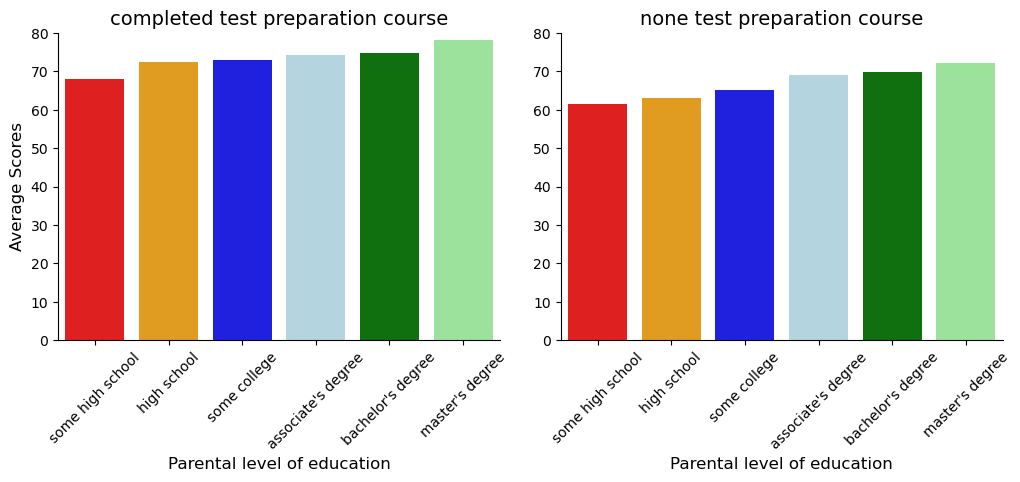

In [144]:
grouped_data = df.groupby(['test_preparation_course', 'parental_level_of_education'])[['average_scores']].mean().reset_index()
g = sns.FacetGrid(data=grouped_data, col='test_preparation_course', hue='parental_level_of_education', palette=['red', 'orange', 'blue', 'lightblue', 'green', 'lightgreen'],
                 height=4, aspect=1.3, sharey=False, ylim=(0,80))
g.map_dataframe(sns.barplot, x='parental_level_of_education', y='average_scores')
g.set_axis_labels('Parental level of education', 'Average Scores', size=12)
g.set_titles(col_template='{col_name} test preparation course', size=14)
g.set_xticklabels(rotation=45, fontsize=10);


De estos gráficos se desprenden dos observaciones: 

1. Quienes completaron el curso de preparación del exámen tienen un promedio de notas más alto, y esto se da independientemente del nivel educativo de los padres. 
2. El curso de preparación del exámen reduce, en pequeña medida, las diferencia en el promedio de notas basadas en el nivel educativo de los padres. En otras palabras, ayuda a igualar el nivel educativo de los estudiantes.

## 4.  La directora quiere saber si los chicos que tuvieron un buen desempeño en una materia también obtuvieron buenas notas en las otras. Observar las correlaciones entre las distintas calificaciones.

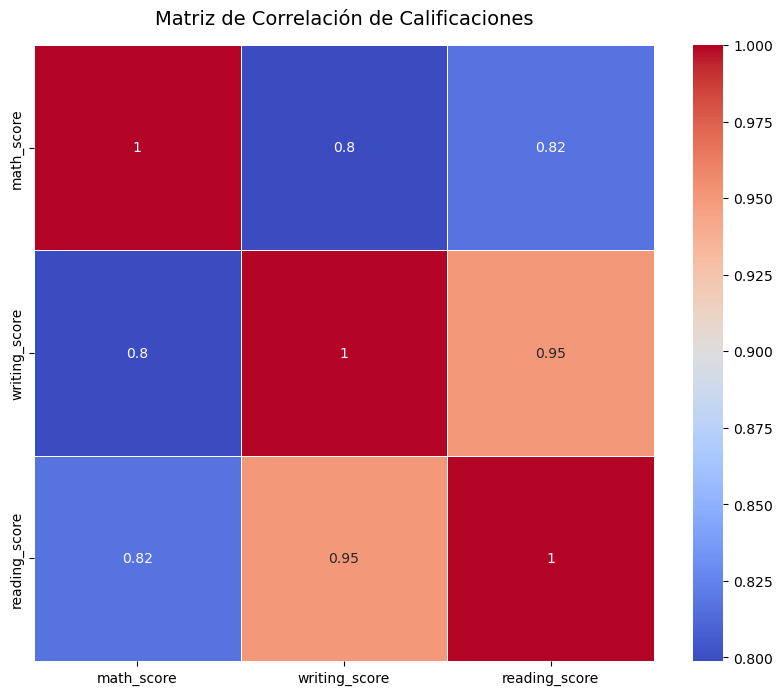

In [151]:
# Calcular la matriz de correlación
matriz_corr = df[['math_score', 'writing_score', 'reading_score']].corr()

# Crear un mapa de calor (heatmap) para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlación de Calificaciones', size=14, pad=15)
plt.show()


Este mapa de calor indica el grado de correlación entre las calificiaciones de los distintos exámenes. 

Se observa que:

1. Entre las calificaciones de los exámenes de lectura y escritura hay una correlación fuerte, es decir, los estudiantes tuvieron un desempeño parecido entre los dos, ya sea con una nota favorable o no. 
2. Para las calificaciones de los exámenes de escritura y matemática, y para las calificaciones de los exámenes de lectura y matemática, existe una correlación significativa.

## Conclusiones

El análisis reveló una correlación entre el nivel educativo de los padres y las calificaciones de los estudiantes. En general, los estudiantes cuyos padres tienen un nivel educativo más alto tienden a obtener calificaciones más altas.

También se concluye que los estudiantes que participaron en el curso de preparación para exámenes obtuvieron calificaciones mejores en comparación con aquellos que no lo hicieron. Esto sugiere que la preparación adecuada para los exámenes tiene un impacto positivo en el desempeño académico.

Por último, se observa una correlación significativa entre las calificaciones de los distintos exámenes (matemáticas, lectura y escritura). Los estudiantes que obtuvieron buenas calificaciones en un área tienden a obtener buenas calificaciones en las otras materias, lo que sugiere la existencia de habilidades generales de estudio o aptitud académica.

Con base en las conclusiones, se recomienda que la escuela continúe ofreciendo cursos de preparación para exámenes como parte de su estrategia educativa. Además, podría ser beneficioso explorar más a fondo las causas de la correlación entre el nivel educativo de los padres y el desempeño de los estudiantes. También se sugiere investigar en detalle las habilidades de estudio que contribuyen a la correlación entre las calificaciones de las diferentes materias.
